# Test the accuracy of the np.gradient

## d cos(2*pi*f*t)/dt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# setting
f = 1 #[Hz]
t0 = 0.01
t = np.arange(0, 2, t0)

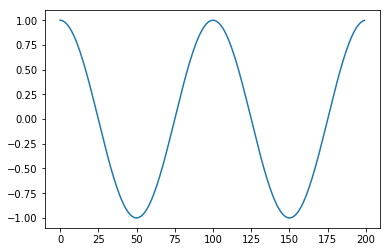

In [10]:
sig = np.cos(2* np.pi* f* t)
plt.plot(signal)

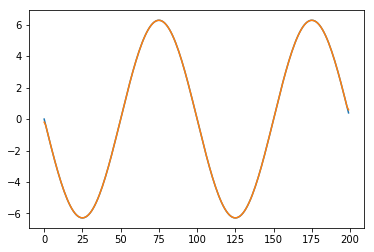

In [15]:
# correct differentiation
dsigdt = -2* np.pi* f* np.sin(2* np.pi* f* t) 
# np,gradient
dsig_approx = np.gradient(sig, t)
plt.plot(dsigdt)
plt.plot(dsig_approx)

## gaussian pulse

In [23]:
import scipy.signal

In [51]:
# setting
fC = 6*10**6 #[Hz]
omega = 2* np.pi* fC
#alpha = fC**2 # bw factor [Hz]**2
B = 0.5
bwr = -6 # [dB]
ref = 10.0**(bwr/ 20)
alpha = -(0.5* omega* B)**2/ (4.0* np.log(ref))
fS = 80* 10**6 #[Hz]
tS = 1/fS
Nt = 256
t = tS*np.arange(0, Nt)
c0 = 6300 #[m/S]
dz = 0.5* tS* c0

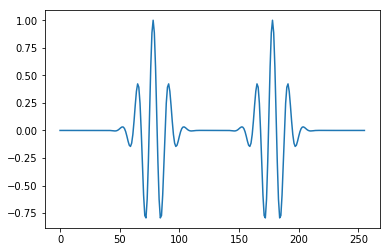

In [52]:
# echo 1 with tof = tS* (Nt/2 - 50)
d1 = (Nt/2 - 50)* dz
tau1 = 2* d1/ c0
h1 = np.exp(-alpha* (t - tau1)**2)* np.cos(omega* (t - tau1))
# echo 2 with tof = (Nt/2 + 50)
d2 = (Nt/2 + 50)* dz
tau2 = 2* d2/ c0
h2 = np.exp(-alpha* (t - tau2)**2)* np.cos(omega* (t - tau2))
# sum up two echos
pulse = h1 + h2
plt.plot(pulse)

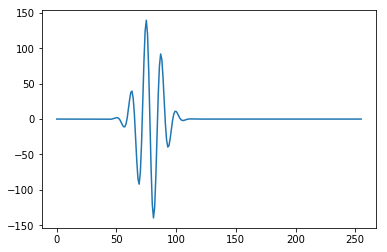

In [53]:
# derivative approximation
dh1_approx = np.gradient(h1, d1) # though this is dh1/dd1 not dh1/dp1
plt.plot(dpulse_approx)

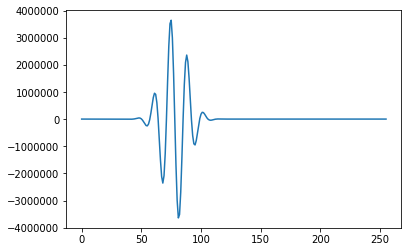

In [54]:
# correct derivative
ipderiv1 = 4* alpha* (t - tau1)/ (c0* d1)
qderiv1 = -2* omega/ (c0* d1)
ip1 = ipderiv1* np.exp(-alpha* (t - tau1)**2)* np.cos(omega* (t - tau1))
q1 = qderiv1* np.exp(-alpha* (t - tau1)**2)* np.sin(omega* (t - tau1))
dh1dp = ip1 + q1
plt.plot(dh1dp)

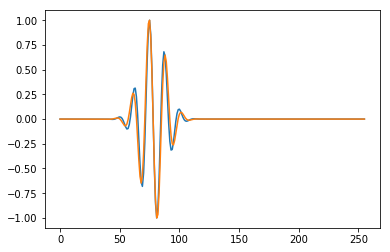

In [55]:
# derivative vs approx
approx = dh1_approx/ abs(dh1_approx).max()
deriv = dh1dp/ abs(dh1dp).max()
plt.plot(approx)
plt.plot(deriv)

In [ ]:
r"""
Results: 
np.gradient seems valid for our case as well

Problem: 
In this code the derivative w.r.t. the l2-norm is calculated. However, we want to get the derivative w.r.t. 
the scan position. Does is still work properly? 

Idea(19.05.07):
Calculate the l2-norm and the tof without ray_tracer
-> then the scan position is reflected in the pulse 
Actually, my implementation might have been wrong, as the l2-norm is used for both tof and the derivative calculation.
However, l2-norm and the difference which is used for tof calculation are differenciated from each other.
-> does it have to be the same...? 

Conculsion:
Check how to get the proper derivative with np.gradient and use that instead

"""